<a href="https://colab.research.google.com/github/chidichukwu/umojahack/blob/main/Cryptojacking_Detection_Starter_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2><center> Welcome to the UmojaHack Africa 2023 Cryptojacking Detection Challenge Starter Notebook</h2></center>
<figure>
<center><img src ="https://drive.google.com/uc?export=view&id=1afxycLZz1AovI0MjqEIiXyziEVWnUkNG" width = "750" height = '500' alt="Cryptojacking Detection Challenge"/>

*About the problem*
> Cryptojacking is a cyber-attack utilizing malicious scripts similar to those from large cryptocurrency houses to illegally mine data without users being aware. These attacks are stealthy and difficult to detect or analyze, often leading to decreased computing speeds for users as well as crashes due to straining of computational resources.


*The objective of this challenge is*:
> classify network activity from various websites as either cryptojacking or not based on features related to both network-based and host-based data.



## Table of contents:

1. [Importing Libraries](#Libraries)
2. [Loading Data](#Data)
3. [Statistical Summaries](#Statistics)
4. [Missing Values and Duplicates](#Missing)
5. [Target Distribution](#Engineering)
6. [Modelling](#Modelling)

<a name="Libraries"></a>
## 1. Importing Libraries


In [38]:
SEED = 1221
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

<a name="Data"></a>
## 2. Loading Data

In [39]:
# Load files
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
samplesubmission = pd.read_csv('SampleSubmission.csv')

# Preview train dataset
train.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1


In [40]:
# Preview test dataset
test.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
0,ID_L7RNFK5JC9,32.709430,121124.141400,30.407359,0.496719,3.999064,0.000000,335.565884,737.338490,1.844013,1.910664,0.311038,0.0,726.318848,20.008686
1,ID_KUTY5K1G5F,2.065990,2029.713475,29.000000,0.000000,3.665467,0.000000,63.845771,41.119875,0.733093,0.577589,0.044430,0.0,385.473839,33.015399
2,ID_H6PJWKU831,114.524684,3888.550764,28.000000,0.486075,0.777719,0.199985,11.354698,11.332477,0.177764,0.133323,0.000000,0.0,504.828540,30.091141
3,ID_DNQXNVTXHE,27.036810,5581.324782,25.000000,0.314968,1.789015,0.000000,44.297028,13.430214,0.302369,0.125987,0.000000,0.0,465.950312,22.211252
4,ID_8CRTF1BJOD,1.177267,176.634467,28.000000,0.000000,1.710369,0.000000,88.161746,57.508380,0.888503,0.777440,0.000000,0.0,771.665166,31.032570


In [41]:
# Preview sample submission file
samplesubmission.head()

,ID,Target
0,ID_VT5SH34X8O,0
1,ID_4RQRV7XN3E,0
2,ID_1XCH999D2E,0
3,ID_J2ZBZIO0RW,0
4,ID_KG3PE5VXCN,0


In [42]:
# Check size and shape of datasets
train.shape, test.shape, samplesubmission.shape

((8908, 16), (3818, 15), (3818, 2))

<a name="Statistics"></a>
## 3. Statistical Summaries

In [43]:
# Train statistical summary
train.describe(include = 'all')

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
count,8908,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000
unique,8908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_4W8AP96UO6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,36.429205,1.135564e+05,29.811900,0.496405,5.353260,1.046153,559.546628,1.655804e+04,4.795485,12.625792,0.988036,0.004177,2779.178084,28.436192,0.269870
std,NaN,75.884647,4.896846e+05,5.691411,1.593626,19.286690,15.667814,1939.745234,9.042803e+04,20.797585,61.246541,12.495768,0.082923,4996.003166,3.970140,0.443917
min,NaN,0.000000,0.000000e+00,1.000000,0.000000,0.044459,0.000000,1.197890,1.554938e+00,0.022183,0.022183,0.000000,0.000000,16.143987,18.057942,0.000000
25%,NaN,1.394404,8.136318e+02,27.000000,0.000000,0.755629,0.000000,33.843800,2.737770e+01,0.399999,0.333225,0.000000,0.000000,351.620535,25.266134,0.000000
50%,NaN,11.613803,4.930482e+03,28.000000,0.034734,1.711077,0.000000,67.366295,8.905770e+01,0.710898,0.635705,0.022222,0.000000,682.943866,28.543826,0.000000
75%,NaN,34.494953,3.940357e+04,30.000000,0.451350,5.845619,0.022229,221.314810,5.613814e+02,1.555063,1.711155,0.088887,0.000000,1356.673217,30.969542,1.000000


In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8908 entries, 0 to 8907
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8908 non-null   object 
 1   I/O Data Operations       8908 non-null   float64
 2    I/O Data Bytes           8908 non-null   float64
 3   Number of subprocesses    8908 non-null   float64
 4   Time on processor         8908 non-null   float64
 5   Disk Reading/sec          8908 non-null   float64
 6   Disc Writing/sec          8908 non-null   float64
 7   Bytes Sent/sent           8908 non-null   float64
 8   Received Bytes (HTTP)     8908 non-null   float64
 9   Network packets sent      8908 non-null   float64
 10  Network packets received  8908 non-null   float64
 11  Pages Read/sec            8908 non-null   float64
 12  Pages Input/sec           8908 non-null   float64
 13  Page Errors/sec           8908 non-null   float64
 14  Confirme

In [45]:
(train.isna()).sum()

ID                          0
I/O Data Operations         0
 I/O Data Bytes             0
Number of subprocesses      0
Time on processor           0
Disk Reading/sec            0
Disc Writing/sec            0
Bytes Sent/sent             0
Received Bytes (HTTP)       0
Network packets sent        0
Network packets received    0
Pages Read/sec              0
Pages Input/sec             0
Page Errors/sec             0
Confirmed byte radius       0
Label                       0
dtype: int64

<a name="Missing"></a>
## 4. Missing Values and Duplicates

In [46]:
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any()

(False, False)

In [47]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

There are no missing values or duplicates

<a name="Class Distribution"></a>
## 5. Target Distribution

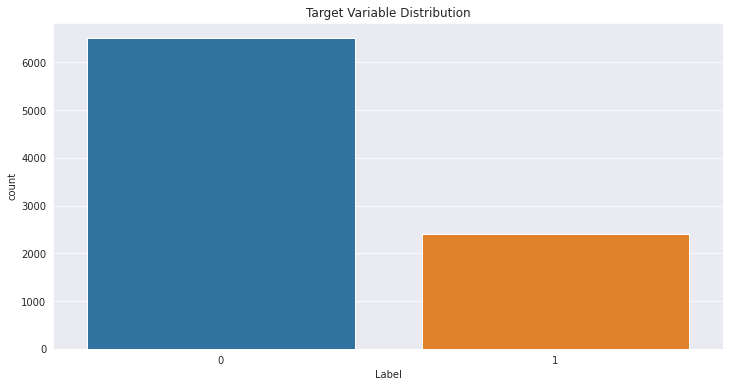

In [48]:
# A box plot showing outliers
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Label', data = train)
plt.title('Target Variable Distribution')
plt.show()

In [49]:
X = train.drop(columns='Label')
y = train['Label']

y

0       1
1       0
2       0
3       0
4       1
       ..
8903    1
8904    0
8905    0
8906    0
8907    0
Name: Label, Length: 8908, dtype: int64

In [50]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1)
X_res,y_res = rus.fit_resample(X,y)
x = pd.DataFrame(X_res)
y = pd.DataFrame(y_res)

train2 = pd.concat([x,y], axis = 1)
train2


,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_QUXAS5B14H,58.218150,1.272283e+05,31.0,0.902715,23.509466,4.110824,2508.246756,97850.132620,21.287400,77.639013,1.177695,0.0,15104.076720,27.297660,0
1,ID_VP34VHWS2O,1.044718,1.445712e+02,27.0,0.000000,0.689069,0.000000,26.251324,16.315387,0.222280,0.244509,0.000000,0.0,287.519797,24.760374,0
2,ID_BRF6CD6JCL,0.000000,0.000000e+00,27.0,0.000000,0.977760,0.000000,37.221560,77.287513,0.533324,0.511102,0.000000,0.0,317.483238,28.986434,0
3,ID_E5LHB2BCIP,129.966410,4.015524e+04,27.0,0.000000,0.599948,0.000000,110.412565,108.857145,1.599860,1.488759,0.000000,0.0,278.308991,26.554480,0
4,ID_7THKZ8XR7L,15.044370,3.099804e+06,32.0,7.986061,7.333297,0.000000,214.887830,565.530546,0.644441,0.822218,0.111111,0.0,6164.391839,34.633568,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,ID_AKGXY41K1H,47.827710,7.371311e+04,33.0,0.417567,31.901310,3.176802,2366.917285,48359.121000,17.727887,35.766790,0.977477,0.0,14595.093910,25.390180,1
4804,ID_8ABPXYH94Q,5.206184,1.206473e+03,25.0,0.000000,1.201427,0.000000,232.616322,5503.457480,2.803330,4.004757,0.000000,0.0,354.741392,31.260762,1
4805,ID_3X7WT3VBKL,19.030549,1.989524e+04,32.0,0.156090,5.694180,0.024974,1982.973263,951.902089,2.747192,2.347601,0.124872,0.0,2000.105752,30.391505,1
4806,ID_9O3VPYAFMZ,4.998256,1.087620e+03,27.0,0.034710,0.444289,0.000000,8.241568,19.304374,0.155501,0.155501,0.000000,0.0,363.251010,22.952369,1


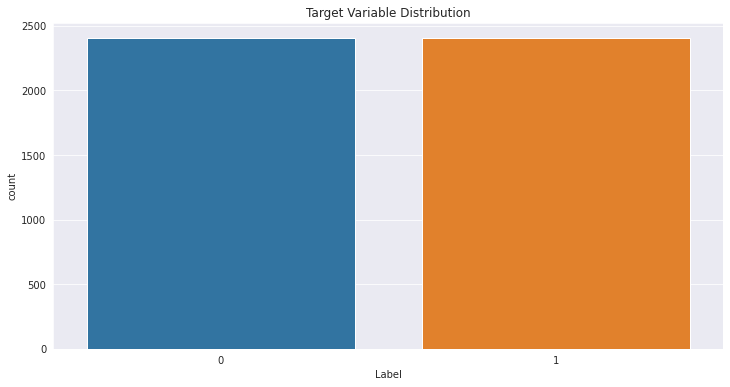

In [51]:
# A box plot showing outliers
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Label', data = train2)
plt.title('Target Variable Distribution')
plt.show()

In [52]:
train2 ['Pages Input/sec'].value_counts()

0.000000    4785
0.000630       6
0.466796       2
2.667046       1
0.244378       1
1.667658       1
1.999323       1
1.044410       1
0.933335       1
0.599948       1
0.911329       1
0.488981       1
0.422336       1
1.422239       1
0.844335       1
1.577969       1
1.666501       1
0.244374       1
Name: Pages Input/sec, dtype: int64

In [53]:
train2 = train2.drop(columns = 'ID')
train2


,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,58.218150,1.272283e+05,31.0,0.902715,23.509466,4.110824,2508.246756,97850.132620,21.287400,77.639013,1.177695,0.0,15104.076720,27.297660,0
1,1.044718,1.445712e+02,27.0,0.000000,0.689069,0.000000,26.251324,16.315387,0.222280,0.244509,0.000000,0.0,287.519797,24.760374,0
2,0.000000,0.000000e+00,27.0,0.000000,0.977760,0.000000,37.221560,77.287513,0.533324,0.511102,0.000000,0.0,317.483238,28.986434,0
3,129.966410,4.015524e+04,27.0,0.000000,0.599948,0.000000,110.412565,108.857145,1.599860,1.488759,0.000000,0.0,278.308991,26.554480,0
4,15.044370,3.099804e+06,32.0,7.986061,7.333297,0.000000,214.887830,565.530546,0.644441,0.822218,0.111111,0.0,6164.391839,34.633568,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,47.827710,7.371311e+04,33.0,0.417567,31.901310,3.176802,2366.917285,48359.121000,17.727887,35.766790,0.977477,0.0,14595.093910,25.390180,1
4804,5.206184,1.206473e+03,25.0,0.000000,1.201427,0.000000,232.616322,5503.457480,2.803330,4.004757,0.000000,0.0,354.741392,31.260762,1
4805,19.030549,1.989524e+04,32.0,0.156090,5.694180,0.024974,1982.973263,951.902089,2.747192,2.347601,0.124872,0.0,2000.105752,30.391505,1
4806,4.998256,1.087620e+03,27.0,0.034710,0.444289,0.000000,8.241568,19.304374,0.155501,0.155501,0.000000,0.0,363.251010,22.952369,1


In [54]:
train3 = train2.drop(columns='Label')

There is a class imbalance in our dataset

In [55]:
from sklearn.feature_selection import f_classif,SelectKBest
fit_X = train2.drop(columns='Label')
fit_y = train2['Label']

In [81]:
fa = SelectKBest(score_func= f_classif, k=12)
fit = fa.fit(fit_X,fit_y)

selected_features = fit.get_feature_names_out()


selected_features  = [col for col in train2 if col in fit.get_feature_names_out()]
final_dataset = train2.filter(selected_features )

final_train = pd.concat([final_dataset,train2['Label']],axis = 1)
final_train


,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,58.218150,1.272283e+05,31.0,0.902715,23.509466,97850.132620,21.287400,77.639013,1.177695,0.0,15104.076720,27.297660,0
1,1.044718,1.445712e+02,27.0,0.000000,0.689069,16.315387,0.222280,0.244509,0.000000,0.0,287.519797,24.760374,0
2,0.000000,0.000000e+00,27.0,0.000000,0.977760,77.287513,0.533324,0.511102,0.000000,0.0,317.483238,28.986434,0
3,129.966410,4.015524e+04,27.0,0.000000,0.599948,108.857145,1.599860,1.488759,0.000000,0.0,278.308991,26.554480,0
4,15.044370,3.099804e+06,32.0,7.986061,7.333297,565.530546,0.644441,0.822218,0.111111,0.0,6164.391839,34.633568,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4803,47.827710,7.371311e+04,33.0,0.417567,31.901310,48359.121000,17.727887,35.766790,0.977477,0.0,14595.093910,25.390180,1
4804,5.206184,1.206473e+03,25.0,0.000000,1.201427,5503.457480,2.803330,4.004757,0.000000,0.0,354.741392,31.260762,1
4805,19.030549,1.989524e+04,32.0,0.156090,5.694180,951.902089,2.747192,2.347601,0.124872,0.0,2000.105752,30.391505,1
4806,4.998256,1.087620e+03,27.0,0.034710,0.444289,19.304374,0.155501,0.155501,0.000000,0.0,363.251010,22.952369,1


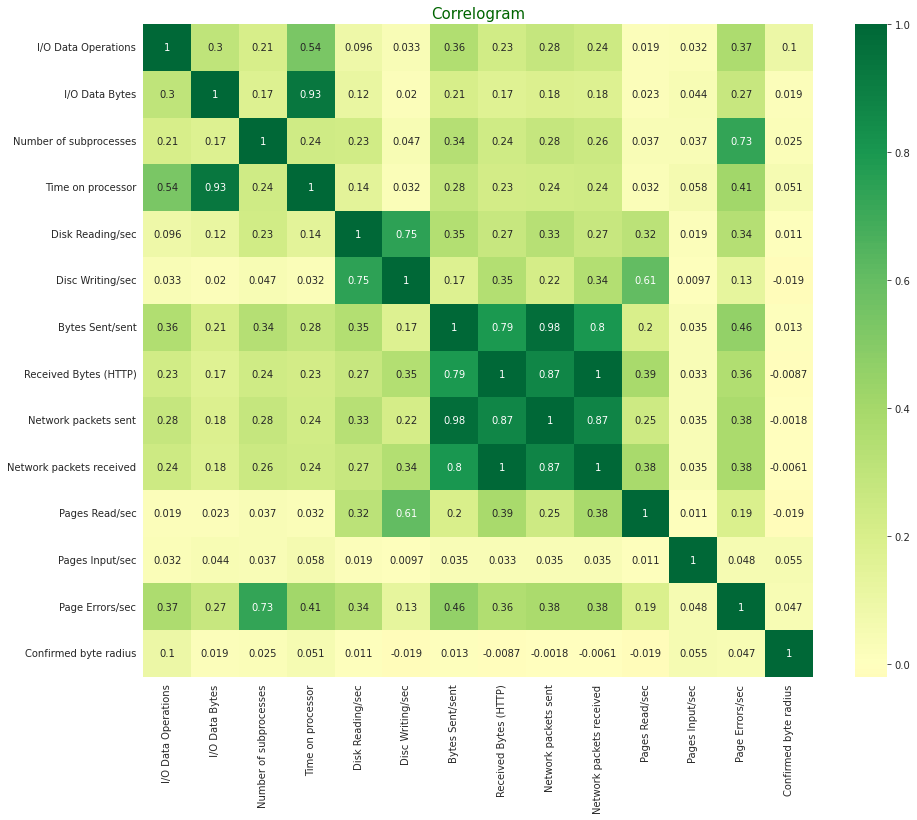

In [57]:
# Plotting a heatmap to show correlations between variables
corr = train3.corr()
plt.figure(figsize = (15, 12))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [58]:
#returns highly correlated features

def correlation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [59]:
corr_features = correlation(train2,0.8)
len(set(corr_features))

3

In [60]:
corr_features

{'Network packets received', 'Network packets sent', 'Time on processor'}

Most features are not strongly correlated with the target

<a name="Preprocess"></a>
## 6. Modeling

In [61]:
#scale numerical features for logistic model
features = train.drop(columns=['ID','Label']).columns
target = 'Label'

# define standard scaler
scaler = StandardScaler()

# transform data
train[features] = scaler.fit_transform(train[features])
test[features] = scaler.transform(test[features])

In [62]:
#split train data into train and validation set
X_train, X_test, y_train, y_test = train_test_split(train[features], 
                                                    train[target].to_frame(),
                                                    stratify=train[target], #to account for class imbalance
                                                    test_size=0.3,
                                                    random_state=SEED)

In [63]:
#fit logistic regression model on rrain data
model = LogisticRegression()
model.fit(X_train, y_train['Label'])

#make predictions on validation set
preds = model.predict(X_test)

In [64]:
#check performance of the model
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      1952
           1       0.74      0.21      0.32       721

    accuracy                           0.77      2673
   macro avg       0.76      0.59      0.59      2673
weighted avg       0.76      0.77      0.71      2673



In [65]:
#make predictions on test set
test['Target'] = model.predict(test[features])

In [66]:
sub = test[['ID', 'Target']]

In [67]:
sub.head()

,ID,Target
0,ID_L7RNFK5JC9,0
1,ID_KUTY5K1G5F,0
2,ID_H6PJWKU831,0
3,ID_DNQXNVTXHE,1
4,ID_8CRTF1BJOD,0


In [68]:
sub.to_csv('UHA_23_crypto.csv', index=False)